# Clustering Yelp Restaurants

**Part 2: To be completed INDIVIDUALLY and due on October 20 at 5pm.**

In this assignment, we will continue to work with the [Yelp dataset](https://www.yelp.com/dataset/challenge) that we used in Homework 2-1. Download the data from Round 10. You can find the format of the dataset [here](https://www.yelp.com/dataset/documentation/json).

We will continue to try to find culinary districts in Las Vegas. 

(As a reminder from last time, these are characterized by closeness and similarity of restaurants. Use the "longitude" and "latitude" to cluster closeness.)

However, in this analysis we will not use the Yelp-supplied "categories" to cluster for similarity as we did in Part 1.

Instead we will cluster the reviews themselves, extracting categories in an unsupervised fashion.  

Specifically, you are to use Latent Semantic Analysis (LSA) on the Yelp reviews to cluster restaurants based off on their reviews.  As a reminder, LSA consists of using PCA applied to the document-term matrix.

LSA was covered in lecture, and there is another tutorial [here.](http://www.datascienceassn.org/sites/default/files/users/user1/lsa_presentation_final.pdf
)

**(20 pts)**

In [1]:
import pandas as pd
import time

start = time.time()
business = pd.read_json('/Users/yuchenyuan/Documents/BU/CS506/f2017-hw2-1-Angelalalahhh/business.json', lines=True)
# create a list to store all restaurants in Las Vegas
R = []
# iterate over df to get all restaurants in Las Vegas
for row in business.itertuples():
    if 'Restaurants' in row.categories and row.city == 'Las Vegas':
        R.append([row.business_id, row.longitude, row.latitude])
IDs = [i[0] for i in R]
review = pd.read_csv('review.csv')
D = {}
for row in review.itertuples():
    if row.business_id in IDs:
        if row.business_id in D:
            D[row.business_id] += row.text
        else:
            D[row.business_id] = row.text
[i.append(D[i[0]]) for i in R]
end = time.time()
print end - start
print R[0]

3194.41631794
[u'LDMCrFlGIFUN6L-FEFgzWg', -115.1167987, 36.196202599999999, "I've been eating chicken at el poll loco since 1986 and the Flavor has decayed over time. It's a shame, because it used to be so good. Same is happening to the rice and beens. I also had a mango avocado salad, it was plain. It had only a few minuscule pieces of mango, half an avocado, broken tortilla chips strip and no dressing.I'm at training for work and went for a quick lunch. I was in the drive thru for 15+ minutes. I ordered the avocado chicken salad, which is my usual meal I order. The lettuce was old and chewy. Sad!!!Newly decorated. Great chicken. Ordering could use some line ropes, it can get a little confusing.Given this location is close to my work I find it convenient. I generally go through the drive through. It can get busy during lunch hours but for the most part they move cars fairly quickly. Customer service has always been good to me and my order is always correct and complete. My typical ord

In [2]:
L = [i[3] for i in R]
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(stop_words='english', min_df=4,max_df=0.8)
dtm = vectorizer.fit_transform(L)
print(type(dtm), dtm.shape)
terms = vectorizer.get_feature_names()
print(terms)

(<class 'scipy.sparse.csr.csr_matrix'>, (5682, 55009))
[u'00', u'000', u'000x', u'001', u'007', u'00a', u'00am', u'00i', u'00ish', u'00it', u'00p', u'00pm', u'00pp', u'00s', u'00this', u'01', u'0100', u'01am', u'01pm', u'02', u'0200', u'02pm', u'03', u'0300', u'03pm', u'04', u'0400', u'04pm', u'05', u'05am', u'05ish', u'05pm', u'06', u'0600', u'0630', u'06pm', u'07', u'0700', u'07am', u'07pm', u'08', u'0800', u'08am', u'08pm', u'09', u'0900', u'0930', u'09pm', u'0_0', u'0_o', u'0d', u'0z', u'10', u'100', u'1000', u'10000', u'100000', u'1000000', u'10000000', u'1000000000', u'10000x', u'1000s', u'1000th', u'1000x', u'100f', u'100ft', u'100i', u'100lb', u'100lbs', u'100my', u'100oz', u'100pp', u'100s', u'100th', u'100the', u'100this', u'100x', u'101', u'1015', u'1015am', u'1015pm', u'102', u'1020', u'1020pm', u'103', u'1030', u'1030a', u'1030am', u'1030ish', u'1030p', u'1030pm', u'104', u'1040', u'1045', u'1045am', u'1045pm', u'105', u'1050', u'106', u'107', u'108', u'109', u'10a', u'10a

In [3]:
import numpy as np
dtm_dense = dtm.todense()
centered_dtm = dtm_dense - np.mean(dtm_dense, axis=0)
np.sum(centered_dtm,axis=0)[:,:10]

matrix([[  2.46556248e-14,  -2.09917804e-14,   1.12193749e-15,
          -1.32539650e-15,  -3.10775711e-15,   4.96491411e-15,
           8.76566614e-15,   7.80612012e-16,  -5.13176605e-16,
           5.42986744e-15]])

In [4]:
from sklearn.utils.extmath import randomized_svd
u, s, vt = randomized_svd(centered_dtm, n_components=50, n_iter=5, random_state=None)
pd.DataFrame(vt,columns=vectorizer.get_feature_names())

,00,000,000x,001,007,00a,00am,00i,00ish,00it,...,zuri,zurich,zushi,zydeco,zz,zzz,zzzz,zzzzz,zzzzzz,zzzzzzz
0,0.000760,-0.000433,-2.253254e-05,-5.059826e-05,-0.000287,-0.000097,-0.000243,-6.763094e-05,-2.434268e-05,-0.000070,...,-3.686289e-05,-0.000003,-0.000060,-0.000091,-0.000020,-0.000025,-1.190939e-05,-3.009387e-05,6.506708e-06,-0.000022
1,-0.000147,-0.000071,9.896350e-05,1.630486e-04,-0.001447,-0.000042,0.000177,-1.717111e-04,3.224435e-07,0.000312,...,-6.785652e-05,-0.000002,-0.000322,-0.000011,-0.000048,0.000029,-1.419593e-05,-3.926233e-05,3.544458e-05,-0.000033
2,-0.004439,-0.001219,6.698044e-05,-2.240218e-04,0.001273,-0.000420,-0.000963,5.956191e-06,-1.734864e-05,0.000269,...,-5.193574e-05,-0.000012,0.000281,-0.000078,-0.000047,-0.000109,-7.492680e-05,-1.855601e-04,-1.767247e-05,-0.000029
3,0.011479,0.001183,5.523374e-05,-2.325541e-04,0.001227,0.000322,0.000567,-3.274934e-06,6.763798e-05,0.000122,...,1.204392e-04,-0.000002,0.000282,-0.000277,0.000055,0.000011,5.050164e-05,1.590418e-04,-1.347386e-04,0.000012
4,0.009208,0.000305,3.161226e-05,-4.731210e-04,-0.001216,0.000107,0.000060,8.651178e-05,6.917325e-05,0.000129,...,1.314872e-04,0.000001,-0.000360,-0.000145,0.000105,-0.000063,2.892783e-05,9.309534e-05,-1.451130e-04,0.000112
5,0.000581,-0.000126,3.194458e-05,1.580785e-04,0.000278,-0.000246,-0.000430,3.917690e-04,-7.590714e-06,0.000007,...,-2.566482e-05,-0.000007,0.000115,-0.000130,-0.000002,0.000125,-1.343138e-05,-6.799020e-05,-6.246555e-05,-0.000055
6,-0.003886,0.000556,-2.854314e-05,-1.428676e-04,-0.000304,-0.000464,-0.001477,-6.872822e-05,-7.018339e-05,-0.000060,...,-3.760049e-07,-0.000003,-0.000037,0.000182,0.000036,-0.000030,-1.167483e-04,-3.050449e-04,4.559790e-05,-0.000148
7,-0.001307,-0.000044,4.646456e-06,1.602613e-04,0.000433,0.000318,0.000787,-1.649488e-04,-8.489071e-06,0.000008,...,-7.388453e-05,-0.000005,0.000140,-0.000164,-0.000092,-0.000031,4.210730e-05,1.075068e-04,-1.264470e-05,-0.000046
8,0.000415,0.000314,-3.579687e-05,-2.947041e-04,-0.000210,0.000776,0.002117,-1.050276e-04,8.776814e-05,-0.000054,...,-6.054452e-05,-0.000029,-0.000006,-0.000464,-0.000075,0.000047,7.557106e-05,1.586291e-04,-5.762674e-05,0.000123
9,0.008112,0.000048,-3.603258e-05,2.334020e-04,0.000084,-0.000087,0.001165,1.436811e-04,-3.551196e-06,-0.000054,...,3.852037e-06,-0.000021,0.000006,-0.000377,0.000064,0.000012,-4.109722e-05,-7.418556e-05,-8.049840e-05,0.000026


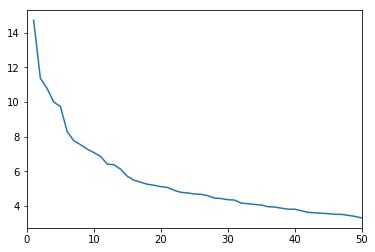

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.xlim([0,50])
plt.plot(range(1,len(s)+1),s)

In [9]:
# it looks like 15 is a resonable number of principle components
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import Normalizer 

lsa = TruncatedSVD(15, algorithm = 'randomized')
dtm_lsa = lsa.fit_transform(centered_dtm) 
dtm_lsa = Normalizer(copy=False).fit_transform(dtm_lsa)
vt = lsa.components_
i = list(range(15))
mydf = pd.DataFrame.from_records(dtm_lsa,columns = i)
mydf

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,-0.280674,0.540062,0.373067,-0.253718,-0.133260,-0.051976,-0.127303,-0.012932,-0.002016,0.082881,-0.149490,0.149669,-0.382748,0.186665,0.395233
1,-0.292683,0.733258,0.457689,0.142580,0.027266,-0.125259,0.078787,0.046136,0.001354,-0.021248,-0.019052,0.037457,-0.108761,-0.039584,0.326308
2,-0.261499,-0.040319,0.192662,-0.628527,-0.288644,-0.256059,0.175655,-0.344942,0.224949,-0.071808,-0.283960,-0.181878,-0.023052,0.166432,-0.037479
3,-0.401626,0.322351,0.460464,0.311276,0.542948,-0.088127,0.049264,-0.119682,-0.172299,-0.145511,-0.054843,-0.026222,0.033984,-0.223189,0.032143
4,-0.297546,0.508729,0.332510,0.448521,0.458446,-0.047052,-0.027769,-0.008539,-0.099686,0.128813,0.117139,-0.012736,0.062378,-0.035971,0.286527
5,-0.123430,-0.110149,0.049314,-0.205431,0.107984,-0.136908,0.062533,-0.044013,0.171274,-0.258836,-0.427664,0.290496,0.460421,0.095073,0.554171
6,0.152818,0.078335,-0.253867,-0.140897,-0.168315,0.479115,0.304809,-0.218961,-0.009703,0.294309,-0.110768,-0.256093,-0.124933,0.549004,0.076789
7,-0.103443,0.006435,-0.070866,-0.099144,-0.009183,-0.061456,0.169551,-0.207143,-0.228411,-0.078172,-0.048516,-0.480971,0.062213,0.766616,-0.123899
8,-0.235328,0.471519,0.187756,0.206721,0.190278,-0.011073,-0.371072,0.056151,-0.089434,0.268924,0.051120,0.179571,-0.253758,0.289975,0.451080
9,-0.178575,-0.105429,-0.499551,0.512242,0.305880,0.124361,0.038217,0.021073,-0.153171,0.339072,0.106887,0.209454,-0.242322,0.220350,0.181986


In [69]:
#newR = [R[i][1:3] for i in range(len(R))]
newR = []
for row in mydf.itertuples():
    newR.append(list(row)[1:])

In [70]:
for i in range(len(newR)):
    newR[i] += [R[i][1]]
    newR[i] += [R[i][2]]
newR[0]

[-0.28067391368974787,
 0.5400617040726523,
 0.37306727844127691,
 -0.2537175995618744,
 -0.13325969392727308,
 -0.051975968258656427,
 -0.12730302506332428,
 -0.012931688814741734,
 -0.0020164900448329456,
 0.082881217607622681,
 -0.14949041107248132,
 0.14966921057184152,
 -0.38274799424620148,
 0.18666511682156312,
 0.39523315692357258,
 -115.1167987,
 36.196202599999999]

In [71]:
c = [str(i) for i in range(15)]
finaldf = pd.DataFrame(newR, columns = c + ['longitude', 'latitude'])
finaldf

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,longitude,latitude
0,-0.280674,0.540062,0.373067,-0.253718,-0.133260,-0.051976,-0.127303,-0.012932,-0.002016,0.082881,-0.149490,0.149669,-0.382748,0.186665,0.395233,-115.116799,36.196203
1,-0.292683,0.733258,0.457689,0.142580,0.027266,-0.125259,0.078787,0.046136,0.001354,-0.021248,-0.019052,0.037457,-0.108761,-0.039584,0.326308,-115.242605,36.112519
2,-0.261499,-0.040319,0.192662,-0.628527,-0.288644,-0.256059,0.175655,-0.344942,0.224949,-0.071808,-0.283960,-0.181878,-0.023052,0.166432,-0.037479,-115.033995,36.083384
3,-0.401626,0.322351,0.460464,0.311276,0.542948,-0.088127,0.049264,-0.119682,-0.172299,-0.145511,-0.054843,-0.026222,0.033984,-0.223189,0.032143,-115.135949,36.159363
4,-0.297546,0.508729,0.332510,0.448521,0.458446,-0.047052,-0.027769,-0.008539,-0.099686,0.128813,0.117139,-0.012736,0.062378,-0.035971,0.286527,-115.173993,36.012191
5,-0.123430,-0.110149,0.049314,-0.205431,0.107984,-0.136908,0.062533,-0.044013,0.171274,-0.258836,-0.427664,0.290496,0.460421,0.095073,0.554171,-115.118701,36.016580
6,0.152818,0.078335,-0.253867,-0.140897,-0.168315,0.479115,0.304809,-0.218961,-0.009703,0.294309,-0.110768,-0.256093,-0.124933,0.549004,0.076789,-115.209894,36.100251
7,-0.103443,0.006435,-0.070866,-0.099144,-0.009183,-0.061456,0.169551,-0.207143,-0.228411,-0.078172,-0.048516,-0.480971,0.062213,0.766616,-0.123899,-115.159804,36.151098
8,-0.235328,0.471519,0.187756,0.206721,0.190278,-0.011073,-0.371072,0.056151,-0.089434,0.268924,0.051120,0.179571,-0.253758,0.289975,0.451080,-115.208013,36.279467
9,-0.178575,-0.105429,-0.499551,0.512242,0.305880,0.124361,0.038217,0.021073,-0.153171,0.339072,0.106887,0.209454,-0.242322,0.220350,0.181986,-115.243588,36.125270


Find clusters using the 3 different techniques we discussed in class: k-means++, hierarchical, and GMM. Visualize the clusters by plotting the longitude/latitude of the restaurants in a scatter plot and label each cluster. 

Note that to label each cluster, you will need to think about how to extract labels from the LSA results.
**(25 pts)**

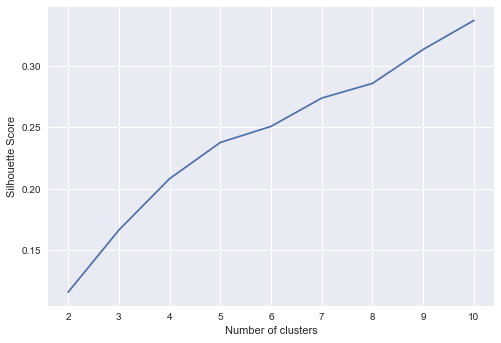

In [72]:
from sklearn.cluster import KMeans
import sklearn.metrics as metrics
import seaborn as sns
# the below function evaluates the silhouette scores and is referenced from professor Crovella's lecture notes
def sc_evaluate_clusters(X,max_clusters):
    s = np.zeros(max_clusters+1)
    s[0] = 0;
    s[1] = 0;
    for k in range(2,max_clusters+1):
        kmeans = KMeans(init='k-means++', n_clusters=k, n_init=10)
        kmeans.fit_predict(X)
        s[k] = metrics.silhouette_score(X,kmeans.labels_,metric='euclidean')
    plt.plot(range(2,len(s)),s[2:])
    plt.xlabel('Number of clusters')
    plt.ylabel('Silhouette Score')
    
sc_evaluate_clusters(finaldf,10)

We will choose to have 5 clusters.

In [73]:
kmeans = KMeans(init='k-means++', n_clusters=5, n_init=100)
kmeans.fit_predict(finaldf)

array([0, 0, 1, ..., 0, 1, 1], dtype=int32)

In [74]:
centroids = kmeans.cluster_centers_
labels = kmeans.labels_
error = kmeans.inertia_
print("The total error of the clustering is: {}.".format(error))
print('\nCluster labels:')
print(labels)
print('\nCluster centroids:')
print(centroids)

The total error of the clustering is: 3568.50921664.

Cluster labels:
[0 0 1 ..., 0 1 1]

Cluster centroids:
[[ -2.44028770e-01   6.47774345e-01   4.14457018e-01   1.72595039e-01
    1.03217476e-01  -5.13850248e-03  -2.36004513e-02   1.30846030e-02
   -9.75877130e-03   8.20353081e-04   7.40939319e-04   2.49225431e-02
   -2.48639451e-02   1.08887278e-03   3.51702069e-02  -1.15182598e+02
    3.61389649e+01]
 [ -1.12080190e-01   1.20639559e-01  -1.70957819e-01  -2.88664952e-01
   -3.42534161e-01  -8.66384249e-02   8.75635711e-02  -4.76215658e-03
    3.16482995e-02  -4.47576001e-02  -8.77901966e-02  -3.01278720e-03
   -6.08135404e-02  -6.28375297e-02  -3.58578148e-02  -1.15188870e+02
    3.61318577e+01]
 [ -1.31466574e-01  -1.07042538e-01  -3.57907433e-01   3.11632314e-01
    1.70465169e-01  -6.73066350e-02   6.41634700e-02   2.69923727e-02
    1.79677455e-02   1.49515445e-04   1.09861502e-02   8.36436757e-03
   -1.70155906e-02  -2.41553255e-02  -1.75480764e-02  -1.15194057e+02
    3.61270

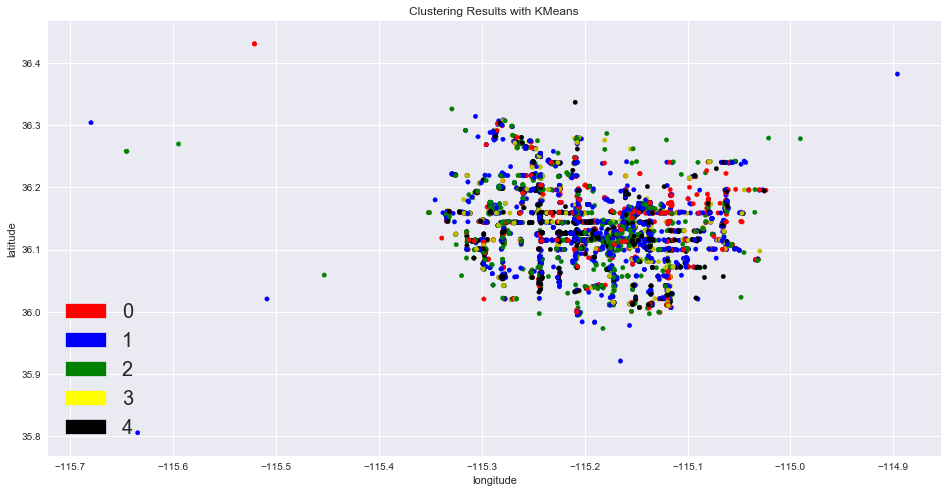

In [75]:
arrayR = np.asarray(newR)
import matplotlib.patches as mpatches
colors = ['rbgyk'[p] for p in labels]
plt.figure(figsize=(16,8))
red_patch = mpatches.Patch(color='red', label='0')
blue_patch = mpatches.Patch(color='blue', label='1')
green_patch = mpatches.Patch(color='green', label='2')
yellow_patch = mpatches.Patch(color='yellow', label='3')
black_patch = mpatches.Patch(color='black', label='4')
plt.legend(handles=[red_patch, blue_patch, green_patch, yellow_patch, black_patch], loc = 'lower left', prop={'size': 20})
plt.title('Clustering Results with KMeans')
plt.xlabel('longitude')
plt.ylabel('latitude')
#plt.xlim(-1154, -1150)
_ = plt.scatter(arrayR[:, -2], arrayR[:, -1], color=colors, s=20)

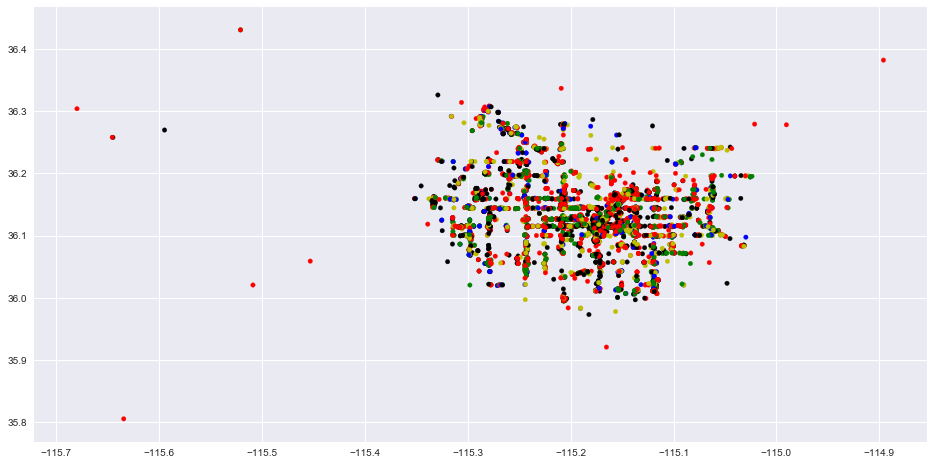

In [77]:
# before scaling longitude and latitude
from sklearn import mixture
gmm = mixture.GaussianMixture(n_components=5, covariance_type='full')
gmm.fit(arrayR)
y_pred = gmm.predict(arrayR)
colors = ['rbgyk'[p] for p in y_pred]
plt.figure(figsize=(16,8))
_ = plt.scatter(arrayR[:, -2], arrayR[:, -1], color=colors, s=20)

Compare your clusters with the results you obtained in Part 1. Use cluster comparison metrics, and also comment on which clustering appears (from your inspection of the clusters) to be more informative, and why. **(15 pts)**

Both the KMeans and GMM results looks similar to the results from Part 1. I think KMeans looks more informative because it shows the catogories of restaurants better, while GMM seems to have put all the outliers in one cluster.

----------